In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

Make graphs more readable using dark theme
(If you are not using a dark theme for jupyter notebook dont run the cell below)

In [2]:
pd.set_option('display.max_rows', 27000)
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'

Load data into a dataframe

In [3]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
deaths_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

In [4]:
confirmed = pd.read_csv(confirmed_url, error_bad_lines=False)
deaths = pd.read_csv(deaths_url, error_bad_lines=False)
recovered = pd.read_csv(recovered_url, error_bad_lines=False)

Clean Dataframes

In [5]:
confirmed.drop(['Lat','Long','Province/State'], axis = 1, inplace = True)
deaths.drop(['Lat','Long','Province/State'], axis = 1, inplace = True)
recovered.drop(['Lat','Long','Province/State'], axis = 1, inplace = True)

In [6]:
confirmed = confirmed.groupby(['Country/Region']).sum().reset_index()
deaths = deaths.groupby(['Country/Region']).sum().reset_index()
recovered = recovered.groupby(['Country/Region']).sum().reset_index()

In [7]:
# narrow the dataframe
confirmed = pd.melt(confirmed, id_vars=['Country/Region'], var_name='Date', value_name='Cases')
deaths = pd.melt(deaths, id_vars=['Country/Region'], var_name='Date', value_name='Deaths')
recovered = pd.melt(recovered, id_vars=['Country/Region'], var_name='Date', value_name='Recovered')

In [8]:
confirmed['Date'] = pd.to_datetime(confirmed['Date'])
deaths['Date'] = pd.to_datetime(deaths['Date'])
recovered['Date'] = pd.to_datetime(recovered['Date'])

In [9]:
confirmed_total = confirmed.groupby(['Date']).sum().reset_index().sort_values(['Date', 'Cases'])
deaths_total = deaths.groupby(['Date']).sum().reset_index().sort_values(['Date', 'Deaths'])
recovered_total = recovered.groupby(['Date']).sum().reset_index().sort_values(['Date', 'Recovered'])

Plotting

In [10]:
# rounds number up to the nearest power of 10
def roundup(n):
    return int(np.ceil(n/np.power(10,len(str(n))-1))) * np.power(10,len(str(n))-1)

# changes numbers in millions to abbreviation 1M, 200M, etc.
def ylabel_function(y, pos):
    return str(y/1000000) + 'M'

# changes numbers in thousands to abbreviation 1K, 200K, etc.
def ylabel_function_thousands(y, pos):
    return str(int(y/1000))+ 'K'

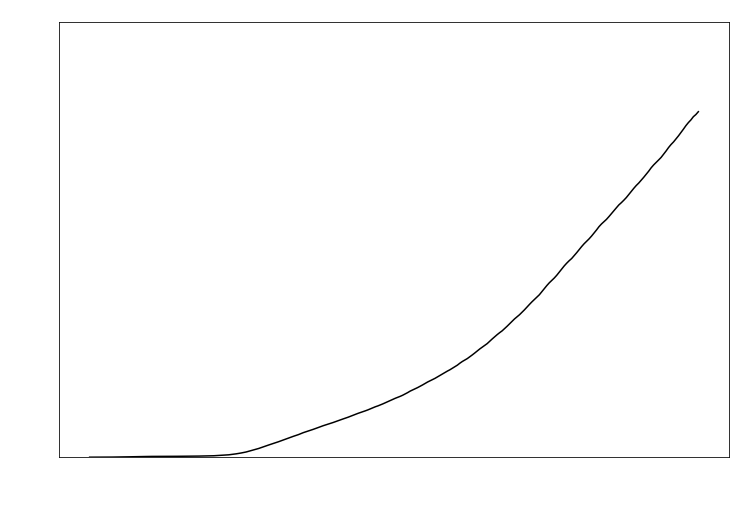

In [11]:
ax = plt.subplot()
ax.set_xlabel('Date')
ax.set_ylabel('Total Coronavirus Cases')
ax.set_title('Total Cases', color = 'white')
ax.figure.set_size_inches(12,8)
ax.set_ylim(0, roundup(confirmed_total.iloc[-1, 1]))

y_formatter = FuncFormatter(ylabel_function)
ax.yaxis.set_major_formatter(y_formatter)

# display every 7th date
x = np.arange(0,len(confirmed_total['Cases']),7)
plt.xticks(x, rotation = 60)

ax.plot(confirmed_total['Date'].dt.strftime('%b %#d'), confirmed_total['Cases'], color = 'black')
plt.show()

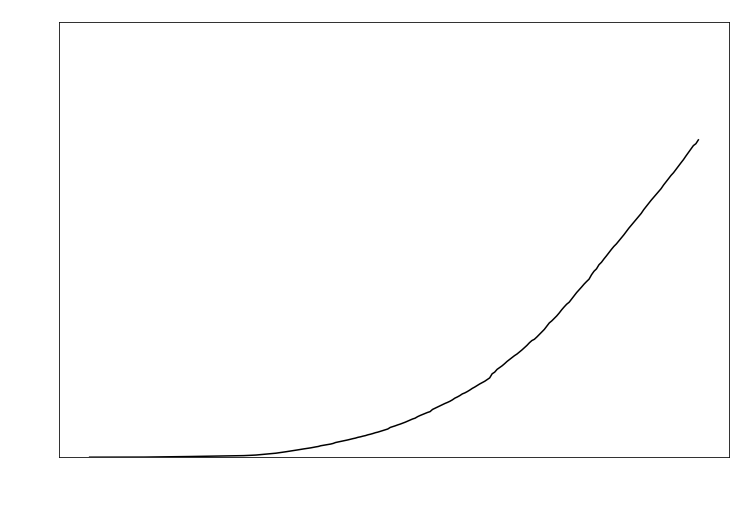

In [12]:
ax.cla()
ax = plt.subplot()
ax.set_xlabel('Date')
ax.set_ylabel('Total Coronavirus Recoveries')
ax.set_title('Total Recoveries', color = 'white')
ax.figure.set_size_inches(12,8)
ax.set_ylim(0, roundup(recovered_total.iloc[-1, 1]))

ax.yaxis.set_major_formatter(y_formatter)

# Displays every 7th date
x = np.arange(0,len(recovered_total['Recovered']),7)
plt.xticks(x, rotation = 60)

ax.plot(recovered_total['Date'].dt.strftime('%b %#d'), recovered_total['Recovered'], color = 'black')
plt.show()

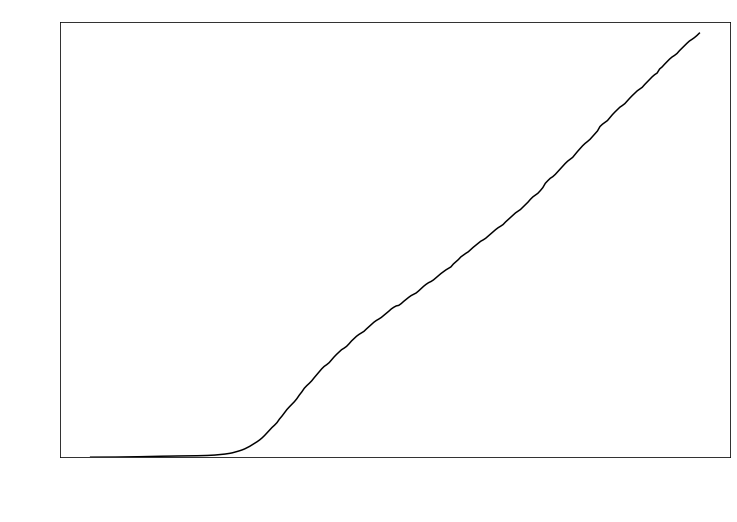

In [13]:
ax.cla()
ax = plt.subplot()
ax.set_xlabel('Date')
ax.set_ylabel('Total Coronavirus Deaths')
ax.set_title('Total Deaths', color = 'white')
ax.figure.set_size_inches(12,8)
ax.set_ylim(0, roundup(deaths_total.iloc[-1, 1]))

y_formatter_thousands = FuncFormatter(ylabel_function_thousands)
ax.yaxis.set_major_formatter(y_formatter_thousands)

# Displays every 7th date
x = np.arange(0,len(deaths_total['Deaths']),7)
plt.xticks(x, rotation = 60)

ax.plot(deaths_total['Date'].dt.strftime('%b %#d'), deaths_total['Deaths'], color = 'black')
plt.show()

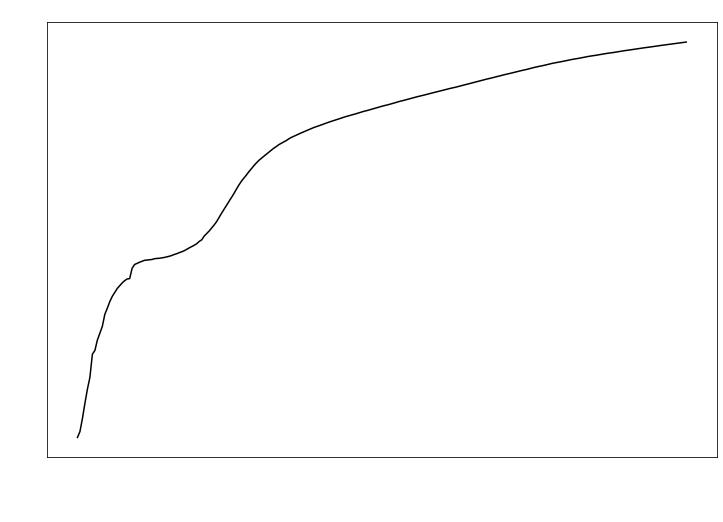

In [14]:
ax = plt.subplot()
ax.set_xlabel('Date')
ax.set_ylabel('Total Coronavirus Cases')
ax.set_title('Total Cases (log scale)', color = 'white')
ax.figure.set_size_inches(12,8)
ax.set_yscale('log')

# Display every 7th date
x = np.arange(0,len(confirmed_total['Cases']),7)
plt.xticks(x, rotation = 60)

ax.plot(confirmed_total['Date'].dt.strftime('%b %#d'), confirmed_total['Cases'], color = 'black')
plt.show()

<ipython-input-15-e70c62c7d343>:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 10**7)


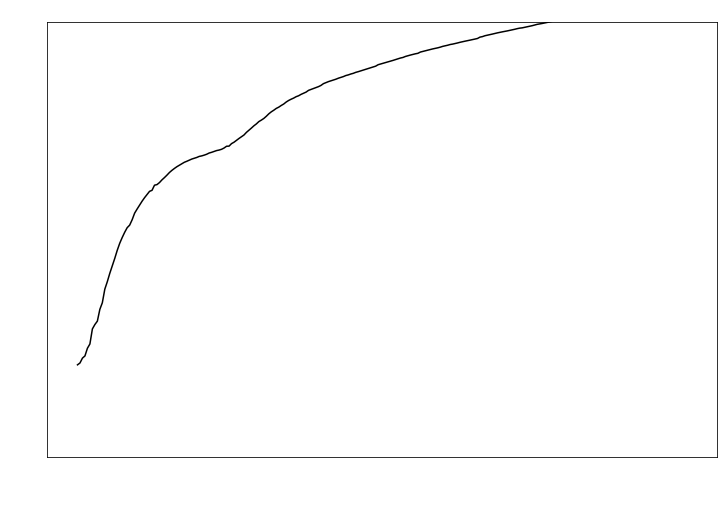

In [15]:
ax = plt.subplot()
ax.set_xlabel('Date')
ax.set_ylabel('Total Coronavirus Recoveries')
ax.set_title('Total Recoveries (log scale)', color = 'white')
ax.figure.set_size_inches(12,8)
ax.set_yscale('log')
ax.set_ylim(0, 10**7)

# Display every 7th date
x = np.arange(0,len(recovered_total['Recovered']),7)
plt.xticks(x, rotation = 60)

ax.plot(recovered_total['Date'].dt.strftime('%b %#d'), recovered_total['Recovered'], color = 'black')
plt.show()

<ipython-input-16-c9fb7b1c41da>:7: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, 10**6)


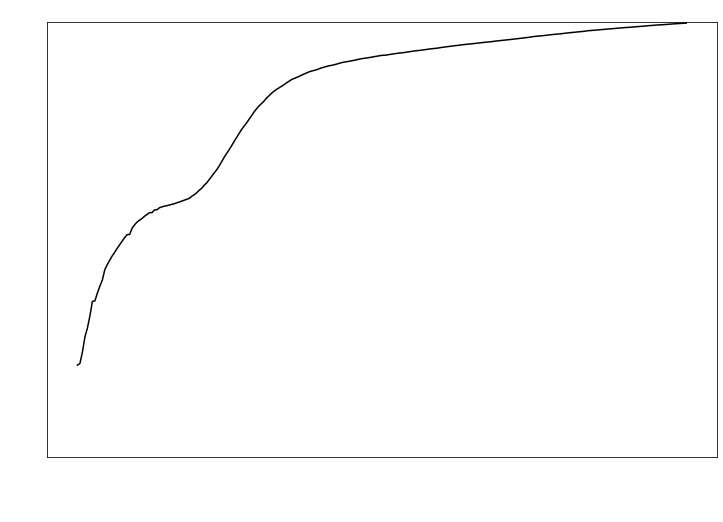

In [16]:
ax = plt.subplot()
ax.set_xlabel('Date')
ax.set_ylabel('Total Coronavirus Deaths')
ax.set_title('Total Deaths (log scale)', color = 'white')
ax.figure.set_size_inches(12,8)
ax.set_yscale('log')
ax.set_ylim(0, 10**6)

# Display every 7th date
x = np.arange(0,len(deaths_total['Deaths']),7)
plt.xticks(x, rotation = 60)

ax.plot(deaths_total['Date'].dt.strftime('%b %#d'), deaths_total['Deaths'], color = 'black')
plt.show()

In [17]:
# convert dataframes from showing the accumulative totals to the daily increase
for i in range((len(confirmed_total['Cases']))-1, 0, -1):
    confirmed_total.iloc[i, 1] = confirmed_total.iloc[i, 1] - confirmed_total.iloc[i-1, 1]
    
for i in range((len(recovered_total['Recovered']))-1, 0, -1):
    recovered_total.iloc[i, 1] = recovered_total.iloc[i, 1] - recovered_total.iloc[i-1, 1]
    
for i in range((len(deaths_total['Deaths']))-1, 0, -1):
    deaths_total.iloc[i, 1] = deaths_total.iloc[i, 1] - deaths_total.iloc[i-1, 1]

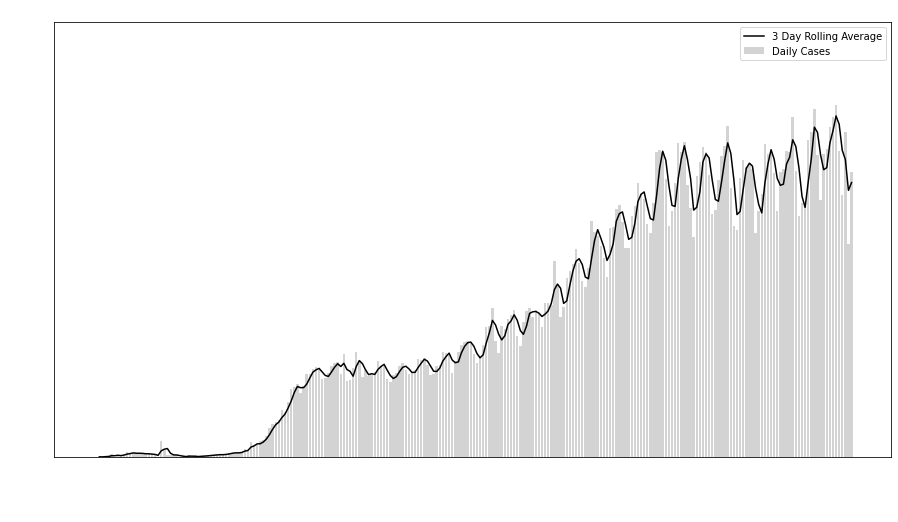

In [18]:
ax = plt.subplot()
plt.xlabel('Date')
plt.ylabel('Coronavirus Cases per Day')
plt.title('Daily Cases', color = 'white')
ax.figure.set_size_inches(15,8)

# Display every 3rd date
x = np.arange(0,len(confirmed_total['Cases']),3)
plt.xticks(x, rotation = 60)

ax.set_ylim(0, roundup(confirmed_total['Cases'].max()))
ax.yaxis.set_major_formatter(y_formatter_thousands)

ax.bar(confirmed_total['Date'].dt.strftime('%b %#d'), confirmed_total['Cases'], color = '#D3D3D3', label = 'Daily Cases')
ax.plot(confirmed_total['Date'].dt.strftime('%b %#d'), confirmed_total.rolling(window=3).mean(), color = 'black', label = '3 Day Rolling Average')
ax.legend()
plt.show()

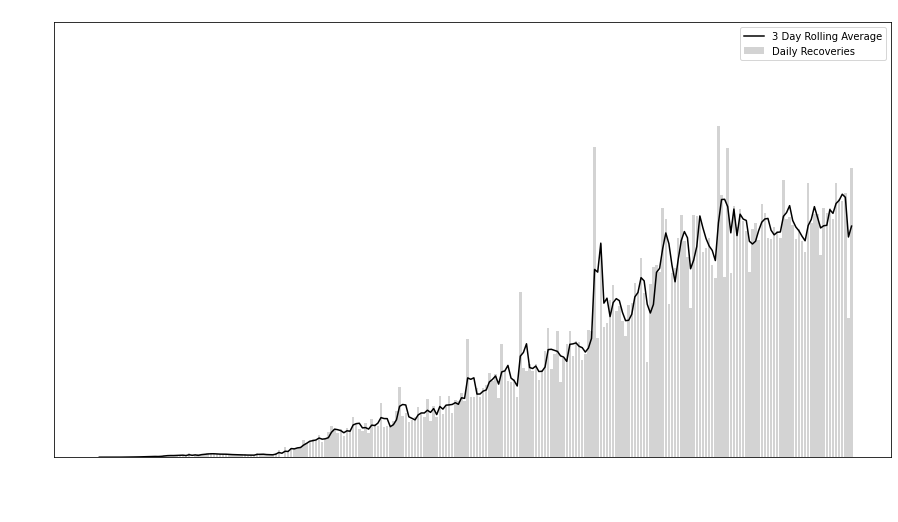

In [19]:
ax = plt.subplot()
plt.xlabel('Date')
plt.ylabel('Coronavirus Recoveries per Day')
plt.title('Daily Recoveries', color = 'white')
ax.figure.set_size_inches(15,8)

# Display every 3rd date
x = np.arange(0,len(recovered_total['Recovered']),3)
plt.xticks(x, rotation = 60)

ax.set_ylim(0, roundup(recovered_total['Recovered'].max()))
ax.yaxis.set_major_formatter(y_formatter_thousands)

ax.bar(recovered_total['Date'].dt.strftime('%b %#d'), recovered_total['Recovered'], color = '#D3D3D3', label = 'Daily Recoveries')
ax.plot(recovered_total['Date'].dt.strftime('%b %#d'), recovered_total.rolling(window=3).mean(), color = 'black', label = '3 Day Rolling Average')
ax.legend()
plt.show()

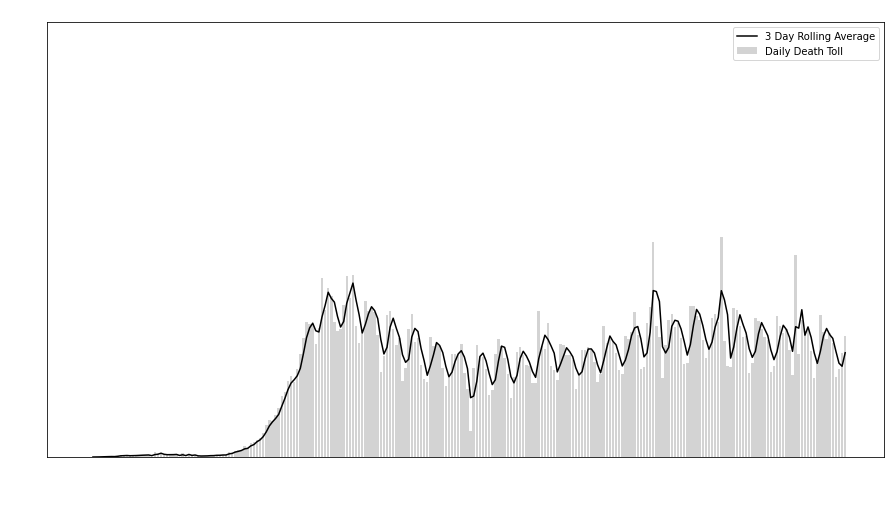

In [20]:
ax = plt.subplot()
plt.xlabel('Date')
plt.ylabel('Coronavirus Deaths per Day')
plt.title('Daily Death Toll', color = 'white')
ax.figure.set_size_inches(15,8)

# Display every 3rd date
x = np.arange(0,len(deaths_total['Deaths']),3)
plt.xticks(x, rotation = 60)

ax.set_ylim(0, roundup(deaths_total['Deaths'].max()))
ax.yaxis.set_major_formatter(y_formatter_thousands)

ax.bar(deaths_total['Date'].dt.strftime('%b %#d'), deaths_total['Deaths'], color = '#D3D3D3', label = 'Daily Death Toll')
ax.plot(deaths_total['Date'].dt.strftime('%b %#d'), deaths_total.rolling(window=3).mean(), color = 'black', label = '3 Day Rolling Average')
ax.legend()
plt.show()